# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [12]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
var = np.var(df['temperature'])

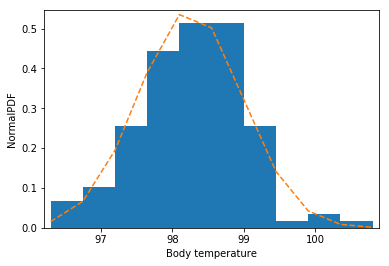

In [4]:
# Your work here.
#The graph below shows the normal distributuion of the temperature data 
import matplotlib.mlab as mlab
import numpy as np
mu = np.mean(df['temperature'])
sigma= np.std(df['temperature'])
n_bins = np.sqrt(len(np.array(df['temperature'])))
n, bins, patches = plt.hist(df['temperature'],bins = 10,normed=1)

y = mlab.normpdf(bins, mu, sigma)
_=plt.plot(bins, y, '--')

plt.margins(0.02)
_ = plt.xlabel('Body temperature')
_ = plt.ylabel('NormalPDF')
plt.show()

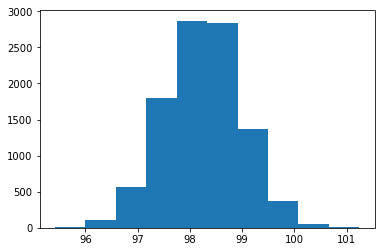

In [5]:
samples = np.random.normal(mu,sigma,size = 10000)
plt.hist(samples)
plt.show()

In [10]:
#test-statistic i.e, find p-value
import scipy.stats as stats
z,pvalue = stats.normaltest(df['temperature'])
if pvalue <0.05:
    print('Not Normal Distribution')
else:
    print('Normal distribution')
#NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)
#This function tests the null hypothesis that a sample comes from a normal distribution

Normal distribution


In [100]:
#A one-sample t-test checks whether a sample mean differs from the population mean
#The T-test is a statistical test used to determine whether a numeric data sample of differs significantly from the population or whether two samples differ from one another.
#Null Hypothesis  - Ho = 98.6 , Alternate hypothesis = Ha <98.6
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
z,pval=stats.ttest_1samp(df['temperature'],popmean=98.6)
z,pval

(-5.4548232923645195, 2.4106320415561276e-07)

In [21]:
if P_Value<0.05:
    print('Ho must be rejected. True Population Mean is NOT 98.6 F')
else:
    print('Ho is True.  True Population mean is 98.6 F.')

Ho must be rejected. True Population Mean is NOT 98.6 F


In [27]:
#compare t-statistic with z-statistic 
#t-statistic - Unknown mean and unknown Std
SE = np.std(df['temperature'])/np.sqrt(130)
T_val = (mu-98.6)/SE
T_val

-5.4759252020781162

In [103]:
P_Value = stats.t.sf(np.abs(T_val),129)#stats.norm.sf(abs(z)) DF = n-1 == 130-1
#p-value = 0



(98.123682111456645,
 98.37477942700491,
 1.959963984540054,
 1.0943732312047587e-07)

In [104]:
SE = np.std(df['temperature'])/np.sqrt(130)
critical_value_z = stats.norm.ppf(0.975) #critical value (z*)
critical_value_t = stats.t.ppf(1-0.025, 129) #critical_value (t*)
range1z = (mu - (critical_value_z*SE))
range2z = (mu + (critical_value_z*SE))
#Confidence interval with z statitic
range1z,range2z

(98.123682111456645, 98.37477942700491)

In [105]:
range1 = (mu - (critical_value_t*SE))
range2 = (mu + (critical_value_t*SE))
range1,range2
#z-statistic and t-statistic show same results 

(98.12249318821641, 98.375968350245145)

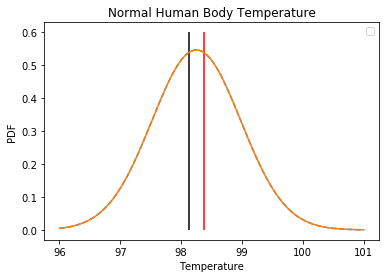

In [48]:
#There is no difference between z - statistics and t-statistics
#import pylab
#x = np.linspace(96,101,130)
#y = stats.norm.pdf(x, loc=mean, scale=std) 
import matplotlib.pyplot as plt
x = np.linspace(96,101,130)

#n, bins, patches = plt.hist(df['temperature'],bins = 10,normed=1)
y = mlab.normpdf(x, mu, sigma)
_=plt.plot(x, y, '--')
plt.plot(x,y)

plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.vlines(range1z,0, 0.6)
plt.vlines(range2z,0,0.6,color='red')
plt.show()
plt.legend(['sample distribution','98.12 F', '98.38 F'])
plt.title('Normal Human Body Temperature')
#Abnormal Body Temp - 98.6

In [66]:
df_F=df[df['gender']=='F']
df_M = df[df['gender']=='M']
df_F_mean = np.mean(df_F['temperature'])
df_M_mean = np.mean(df_M['temperature'])
df_F_std = np.std(df_F['temperature'])
df_M_std = np.std(df_M['temperature'])
df_F_mean,df_M_mean

(98.39384615384613, 98.1046153846154)

In [87]:
#Comaprsion between means 
#mean difference for both F n M
df_mean_diff = df_M_mean - df_F_mean
df_mean_diff

-0.289230769230727

In [132]:
import scipy.stats as stats

SE_both = ((df_F_std**2)/65 + (df_M_std**2)/((65)))**(0.5)
t_stat= df_mean_diff/SE_both
SE_F

0.0

In [99]:
p=stats.t.sf(np.abs(t_stat), 128)*2 #DF = 128 2 sided 

0.022879279869584303

In [90]:
critical_value_t1 = stats.t.ppf(1-0.025, 64)

In [91]:
#The value 0 is not included in THe CI , so we can reject null hypothesis. There is significant difference between female and male body temperatures
range1f = (df_mean_diff - (critical_value_t1*SE_both))
range2f = (df_mean_diff + (critical_value_t1*SE_both))
range1f,range2f


(-0.54009903708341722, -0.038362501378036762)

In [97]:
# margin of error m of a confidence interval is defined to be the value added or subtracted from the sample mean which determines the length of the interval: m = z*
m1 = critical_value_t1*SE_both
m=m1/np.sqrt(130)

0.022002602610986577

In [108]:
range2z-m,range2z+m
#Above 98.6 is abnormal temperature

(98.123911159152215, 98.625647694857605)

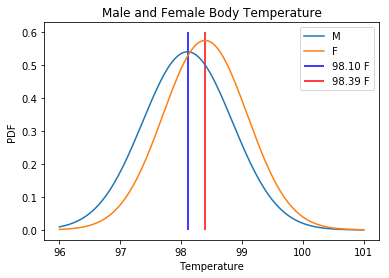

In [133]:
import pylab
x = np.linspace(96,101,130)

y1 = mlab.normpdf(x, df_M_mean,df_F_std )    
pylab.plot(x,y1)

y2 = mlab.normpdf(x, df_F_mean, df_M_std)    
pylab.plot(x,y2)
pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(df_M_mean,0, 0.6, color='blue')
pylab.vlines(df_F_mean,0,0.6, color='red')
pylab.legend(['M', 'F', '98.10 F', '98.39 F'])
pylab.title('Male and Female Body Temperature')
pylab.show()